In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
pip install ucimlrepo


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [178]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  

In [179]:
X = adult.data.features 
y = adult.data.targets 

In [180]:
df = pd.concat([X,y] , axis = 1)

In [181]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [184]:
df["income"].value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [185]:
df['income'] = df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})

In [187]:
df["income"].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [188]:
numerical = [col for col in df.columns if df[col].dtypes !="O"]

In [189]:
categorical = [col for col in df.columns if df[col].dtypes == "O"]

In [190]:
len(numerical)

6

In [191]:
len(categorical)

9

In [192]:
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [193]:
df["workclass"].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [194]:
df["native-country"].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [195]:
df["occupation"].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [196]:
df["native-country"].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [197]:
df[categorical].isnull().sum()

workclass         963
education           0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
native-country    274
income              0
dtype: int64

In [198]:
for var in categorical:
    print(df[var].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64
occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      

In [199]:
for var in categorical:
    print(df[var].value_counts()/len(df))

workclass
Private             0.694198
Self-emp-not-inc    0.079071
Local-gov           0.064207
State-gov           0.040559
?                   0.037591
Self-emp-inc        0.034704
Federal-gov         0.029319
Without-pay         0.000430
Never-worked        0.000205
Name: count, dtype: float64
education
HS-grad         0.323164
Some-college    0.222718
Bachelors       0.164305
Masters         0.054400
Assoc-voc       0.042197
11th            0.037099
Assoc-acdm      0.032779
10th            0.028439
7th-8th         0.019553
Prof-school     0.017075
9th             0.015478
12th            0.013452
Doctorate       0.012162
5th-6th         0.010421
1st-4th         0.005057
Preschool       0.001699
Name: count, dtype: float64
marital-status
Married-civ-spouse       0.458192
Never-married            0.329982
Divorced                 0.135805
Separated                0.031325
Widowed                  0.031080
Married-spouse-absent    0.012858
Married-AF-spouse        0.000758
Name: coun

In [200]:
df["workclass"].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [201]:
df["workclass"].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked',
       nan], dtype=object)

In [202]:
df["workclass"].replace("?",np.NaN,inplace = True)

C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_7404\2796391794.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["workclass"].replace("?",np.NaN,inplace = True)


In [203]:
df["workclass"].isnull().sum()

2799

In [204]:
for var in categorical:
    print(df[var].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64
occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         

In [205]:
df["occupation"].replace("?",np.NaN,inplace = True)

C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_7404\1022474160.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["occupation"].replace("?",np.NaN,inplace = True)


In [206]:
df["native-country"].value_counts()
df["native-country"].replace("?",np.NaN, inplace = True)

C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_7404\3824908375.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["native-country"].replace("?",np.NaN, inplace = True)


In [207]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [208]:
df["income"].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [209]:
df[categorical].isnull().sum()

workclass         2799
education            0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
native-country     857
income               0
dtype: int64

In [210]:
# # workclass         2799   and 
# occupation        2809 and 
# native-country     857 is nuull value contain 
for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital-status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native-country  contains  42  labels
income  contains  2  labels


In [211]:
df[numerical].dtypes

age               int64
fnlwgt            int64
education-num     int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
dtype: object

In [212]:
df['Income'] = df['Income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})

KeyError: 'Income'

In [213]:
# 8 . Declare feature vector and target variable
x = df.drop(["income"] , axis = 1)
y = df["income"]

In [214]:
from sklearn.model_selection import train_test_split

In [215]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size =0.20 , random_state = 0)

In [216]:
x_train.shape , x_test.shape

((39073, 14), (9769, 14))

# Feature Engineering

In [217]:
x_train.shape

(39073, 14)

In [218]:
categorical = [col for col in x_train.columns if x_train[col].dtypes == "O"]
categorical

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [219]:
numerical = [col for col in x_train.columns if x_train[col].dtypes != "O"]
numerical

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [220]:
x_train[categorical].isnull().mean()

workclass         0.057405
education         0.000000
marital-status    0.000000
occupation        0.057636
relationship      0.000000
race              0.000000
sex               0.000000
native-country    0.017122
dtype: float64

In [221]:
for col in categorical:
    if x_train[col].isnull().mean()>0:
        print(col , (x_train[col].isnull().mean()))

workclass 0.057405369436695414
occupation 0.05763570752181814
native-country 0.01712179766078878


In [222]:
for df2 in [x_train , x_test]:
    df2["workclass"].fillna(x_train["workclass"].mode()[0],inplace = True)
    df2["occupation"].fillna(x_train["occupation"].mode()[0],inplace = True)
    df2["native-country"].fillna(x_train["native-country"].mode()[0],inplace = True)

C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_7404\3003890725.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2["workclass"].fillna(x_train["workclass"].mode()[0],inplace = True)
C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_7404\3003890725.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [223]:
x_train[categorical].isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
dtype: int64

In [224]:
x_test[categorical].isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
dtype: int64

In [225]:
# Encode categorical variable
x_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [226]:
x_train[categorical].head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
22729,Self-emp-inc,11th,Never-married,Sales,Own-child,White,Male,United-States
8650,Local-gov,Assoc-voc,Never-married,Prof-specialty,Not-in-family,White,Female,United-States
26605,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
15864,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2516,Private,12th,Married-civ-spouse,Other-service,Wife,White,Female,United-States


In [227]:
import category_encoders as ce

In [228]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native-country'])
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [229]:
x_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41
22729,18,1,0,0,0,0,0,0,0,117372,...,0,0,0,0,0,0,0,0,0,0
8650,36,0,1,0,0,0,0,0,0,357720,...,0,0,0,0,0,0,0,0,0,0
26605,62,0,0,1,0,0,0,0,0,202242,...,0,0,0,0,0,0,0,0,0,0
15864,30,0,0,0,1,0,0,0,0,303692,...,0,0,0,0,0,0,0,0,0,0
2516,25,0,0,1,0,0,0,0,0,374918,...,0,0,0,0,0,0,0,0,0,0


In [230]:
x_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41
38113,41,0,0,1,0,0,0,0,0,151856,...,0,0,0,0,0,0,0,0,0,0
39214,57,0,0,0,1,0,0,0,0,87584,...,0,0,0,0,0,0,0,0,0,0
44248,31,0,1,0,0,0,0,0,0,220669,...,0,0,0,0,0,0,0,0,0,0
10283,55,0,0,1,0,0,0,0,0,171355,...,0,0,0,0,0,0,0,0,0,0
26724,59,0,0,0,1,0,0,0,0,148626,...,0,0,0,0,0,0,0,0,0,0


In [231]:
x_train.shape

(39073, 105)

In [232]:
x_test.shape

(9769, 105)

# Feature Scalling

In [233]:
cols = x_train.columns

In [234]:
from sklearn.preprocessing import RobustScaler

In [235]:
scaler = RobustScaler()

In [236]:
x_train = scaler.fit_transform(x_train)
x_test =  scaler.transform(x_test)

In [237]:
x_train = pd.DataFrame(x_train , columns = [cols])

In [238]:
x_test = pd.DataFrame(x_test , columns = [cols])

In [239]:
x_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41
0,-0.95,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-0.505533,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.05,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.504990,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.204408,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.35,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,1.053043,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.648852,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [240]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [241]:
gnb = gnb.fit(x_train , y_train)
GaussianNB(priors=None, var_smoothing=1e-09)

GaussianNB()

In [242]:
y_pred = gnb.predict(x_test)

In [243]:
y_pred

array(['>50K', '<=50K', '>50K', ..., '>50K', '<=50K', '>50K'], dtype='<U5')

In [244]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test , y_pred)

In [245]:
score

0.8067355921793428

In [246]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train , y_train)
GaussianNB(priors=None, var_smoothing=1e-09)

GaussianNB()

In [247]:
y_pred = gnb.predict(x_test)
y_pred

array(['>50K', '<=50K', '>50K', ..., '>50K', '<=50K', '>50K'], dtype='<U5')

In [248]:
#Check accuracy score
from sklearn.metrics import accuracy_score

In [249]:
accuracy_score(y_test , y_pred)

0.8067355921793428

In [250]:
gnb.score(x_train , y_train)

0.8000921352340491

In [251]:
gnb.score(x_test,y_test)

0.8067355921793428

In [252]:
y_test.value_counts()

income
<=50K    7472
>50K     2297
Name: count, dtype: int64

In [253]:
# Null accuracy is the accuracy that could be achieved by always predicting the most frequent class
null_accuracy = (7472/(7472+2297))
print(null_accuracy)

0.7648684614597195


In [ ]:
# 15. Confusion matrix
# A confusion matrix is a tool for summarizing the performance of a classification algorithm. A 
# confusion matrix will give us a clear picture of classification model performance and the types of


In [258]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
print('Confusion matrix\n\n', cm)
print("\n True Positive" , cm[0,0])
print("\n True Negative" , cm[1,1])
print("\n FALSE Positive" , cm[0,1])
print("\n False Negative" , cm[1,0])

Confusion matrix

 [[5995 1477]
 [ 411 1886]]

 True Positive 5995

 True Negative 1886

 FALSE Positive 1477

 False Negative 411


<Axes: >

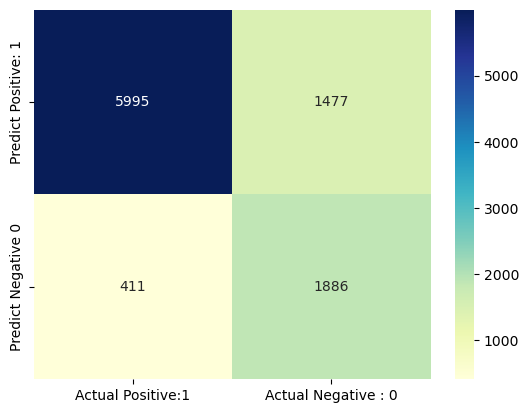

In [259]:
cm_matrix = pd.DataFrame(data = cm , columns = ["Actual Positive:1", "Actual Negative : 0"], index = ["Predict Positive: 1" , "Predict Negative 0"])
sns.heatmap(cm_matrix , annot = True , fmt = "d" , cmap = "YlGnBu")

In [261]:
# 16. Classification metrices
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

       <=50K       0.94      0.80      0.86      7472
        >50K       0.56      0.82      0.67      2297

    accuracy                           0.81      9769
   macro avg       0.75      0.81      0.77      9769
weighted avg       0.85      0.81      0.82      9769



In [262]:
# Classification accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [264]:
Classification_accuracy = (TP+TN)/float(TP+TN+FP+FN)
print(Classification_accuracy)

0.8067355921793428


In [265]:
Classification_error = (FP+FN)/float(TP+TN+FP+FN)
Classification_error

0.19326440782065718

In [266]:
#Precision
Precision = TP / float(TP+FP)
print(Precision)

0.8023286937901499


In [268]:
# Recall
recall = TP / float(TP+FN)
recall

0.9358413986887293

In [269]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9358


In [270]:
false_positive_rate = FP / float(FP + TN)
false_positive_rate

0.4391911983348201

In [271]:
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5608


In [272]:
# f1-score
y_pred_prob = gnb.predict_proba(x_test)[0:10]
y_pred_prob

array([[1.78071635e-01, 8.21928365e-01],
       [9.58927933e-01, 4.10720668e-02],
       [7.77923208e-06, 9.99992221e-01],
       [6.22235607e-01, 3.77764393e-01],
       [9.10054285e-01, 8.99457151e-02],
       [2.49045659e-04, 9.99750954e-01],
       [9.84663632e-01, 1.53363682e-02],
       [9.99886087e-01, 1.13912667e-04],
       [1.07591557e-01, 8.92408443e-01],
       [7.25354383e-01, 2.74645617e-01]])

In [275]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])
y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,0.178072,0.821928
1,0.958928,0.041072
2,0.000008,0.999992
3,0.622236,0.377764
4,0.910054,0.089946
5,0.000249,0.999751
6,0.984664,0.015336
7,0.999886,0.000114
8,0.107592,0.892408
9,0.725354,0.274646


In [277]:
gnb.predict_proba(x_test)[0:10, 1]

array([8.21928365e-01, 4.10720668e-02, 9.99992221e-01, 3.77764393e-01,
       8.99457151e-02, 9.99750954e-01, 1.53363682e-02, 1.13912667e-04,
       8.92408443e-01, 2.74645617e-01])

In [279]:
# store the predicted probabilities for class 1 - Probability of >50K
y_pred1 = gnb.predict_proba(x_test)[:, 1]

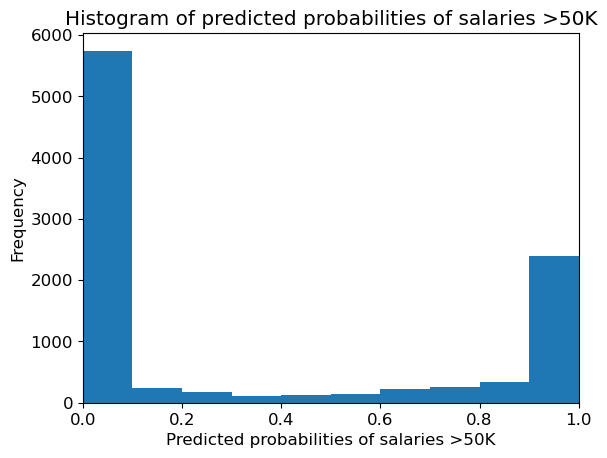

In [281]:
# plot histogram of predicted probabilities
# adjust the font size 
plt.rcParams['font.size'] = 12
# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)
# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')
# set the x-axis limit
plt.xlim(0,1)
# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')
plt.show()

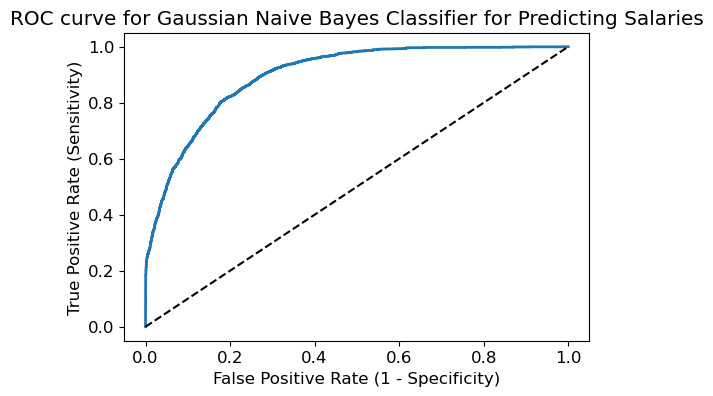

In [283]:
# plot ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '>50K')
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()          

In [284]:
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred1)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8982


In [287]:
from sklearn.model_selection import cross_val_score
Cross_validated_ROC_AUC = cross_val_score(gnb, x_train, y_train, cv=5 , scoring = "roc_auc").mean()
print(Cross_validated_ROC_AUC)

0.8926753426208679


In [289]:
# K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gnb, x_train, y_train, cv = 10, 
scoring='accuracy')

In [290]:
print('Cross-validation scores:{}'.format(scores))


Cross-validation scores:[0.78787103 0.79964176 0.81499488 0.79703097 0.80445354 0.79421551
 0.79370361 0.80368569 0.79779882 0.80419759]


In [294]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))    

Average cross-validation score: 0.7998


In [295]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))


Average cross-validation score: 0.7998
